**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . 

The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content**

It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

[Data here](https://www.kaggle.com/kazanova/sentiment140?select=training.1600000.processed.noemoticon.csv)

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #ignore warnings

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26336\95730579.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # for data manipulation


In [2]:
df = pd.read_csv("data.csv", encoding = 'latin', header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

**Renaming the Columns**

In [7]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Trimming the data**

In [8]:
df.drop(['id','query','user_id'],axis = 1,inplace = True)

In [9]:
df.head()

,sentiment,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


In [10]:
df['sentiment'] = df['sentiment'].replace(4,1)

<Axes: xlabel='sentiment', ylabel='count'>

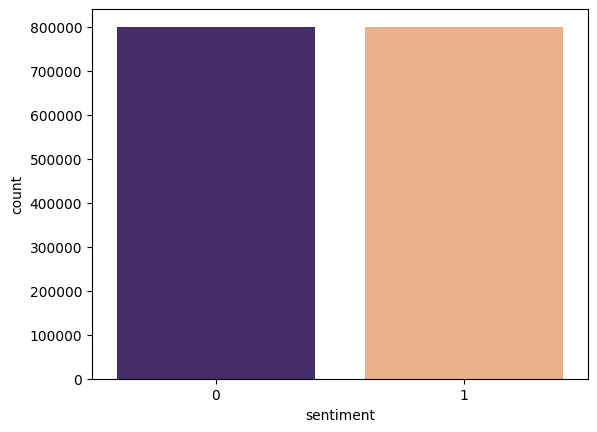

In [11]:
import seaborn as sns
sns.countplot(x="sentiment", data=df,palette=['#432371',"#FAAE7B"])

In [12]:
df.columns

Index(['sentiment', 'date', 'text'], dtype='object')

**Temporal Analysis**

In [13]:
df['date'].str.slice(4,11)

0          Apr 06 
1          Apr 06 
2          Apr 06 
3          Apr 06 
4          Apr 06 
            ...   
1599995    Jun 16 
1599996    Jun 16 
1599997    Jun 16 
1599998    Jun 16 
1599999    Jun 16 
Name: date, Length: 1600000, dtype: object

In [14]:
from dateutil import parser
# Convert 'date' column to datetime format using dateutil.parser
df['timestamp'] = df['date'].apply(lambda x: parser.parse(x).strftime('%H:%M:%S'))

# Display the updated DataFrame
print(df[['date', 'timestamp']])

                                 date timestamp
0        Mon Apr 06 22:19:45 PDT 2009  22:19:45
1        Mon Apr 06 22:19:49 PDT 2009  22:19:49
2        Mon Apr 06 22:19:53 PDT 2009  22:19:53
3        Mon Apr 06 22:19:57 PDT 2009  22:19:57
4        Mon Apr 06 22:19:57 PDT 2009  22:19:57
...                               ...       ...
1599995  Tue Jun 16 08:40:49 PDT 2009  08:40:49
1599996  Tue Jun 16 08:40:49 PDT 2009  08:40:49
1599997  Tue Jun 16 08:40:49 PDT 2009  08:40:49
1599998  Tue Jun 16 08:40:49 PDT 2009  08:40:49
1599999  Tue Jun 16 08:40:50 PDT 2009  08:40:50

[1600000 rows x 2 columns]


In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_grouped = df.groupby(pd.Grouper(key='timestamp', freq='H')).size().reset_index(name='tweet_count')
print(df_grouped[['timestamp', 'tweet_count']])

             timestamp  tweet_count
0  2024-02-04 00:00:00        80865
1  2024-02-04 01:00:00        75268
2  2024-02-04 02:00:00        73991
3  2024-02-04 03:00:00        74253
4  2024-02-04 04:00:00        76995
5  2024-02-04 05:00:00        78623
6  2024-02-04 06:00:00        80852
7  2024-02-04 07:00:00        83654
8  2024-02-04 08:00:00        76287
9  2024-02-04 09:00:00        67278
10 2024-02-04 10:00:00        60689
11 2024-02-04 11:00:00        61009
12 2024-02-04 12:00:00        51653
13 2024-02-04 13:00:00        49689
14 2024-02-04 14:00:00        50380
15 2024-02-04 15:00:00        50643
16 2024-02-04 16:00:00        55720
17 2024-02-04 17:00:00        51843
18 2024-02-04 18:00:00        53485
19 2024-02-04 19:00:00        57722
20 2024-02-04 20:00:00        57059
21 2024-02-04 21:00:00        68964
22 2024-02-04 22:00:00        78328
23 2024-02-04 23:00:00        84750


In [16]:
df['sentiment'] = df['sentiment'].astype('category')
df_grouped = df.groupby([pd.Grouper(key='timestamp', freq='H'), 'sentiment']).size().unstack(fill_value=0).reset_index()
sentiment_categories = df['sentiment'].cat.categories
df_grouped['total_tweets'] = df_grouped[sentiment_categories].sum(axis=1)

# Display the result
print(df_grouped[['timestamp'] + list(sentiment_categories) + ['total_tweets']])

sentiment           timestamp      0      1  total_tweets
0         2024-02-04 00:00:00  35582  45283         80865
1         2024-02-04 01:00:00  30581  44687         75268
2         2024-02-04 02:00:00  30171  43820         73991
3         2024-02-04 03:00:00  31717  42536         74253
4         2024-02-04 04:00:00  34946  42049         76995
5         2024-02-04 05:00:00  37774  40849         78623
6         2024-02-04 06:00:00  40076  40776         80852
7         2024-02-04 07:00:00  42208  41446         83654
8         2024-02-04 08:00:00  40166  36121         76287
9         2024-02-04 09:00:00  36511  30767         67278
10        2024-02-04 10:00:00  31597  29092         60689
11        2024-02-04 11:00:00  31336  29673         61009
12        2024-02-04 12:00:00  28120  23533         51653
13        2024-02-04 13:00:00  27449  22240         49689
14        2024-02-04 14:00:00  27077  23303         50380
15        2024-02-04 15:00:00  28531  22112         50643
16        2024

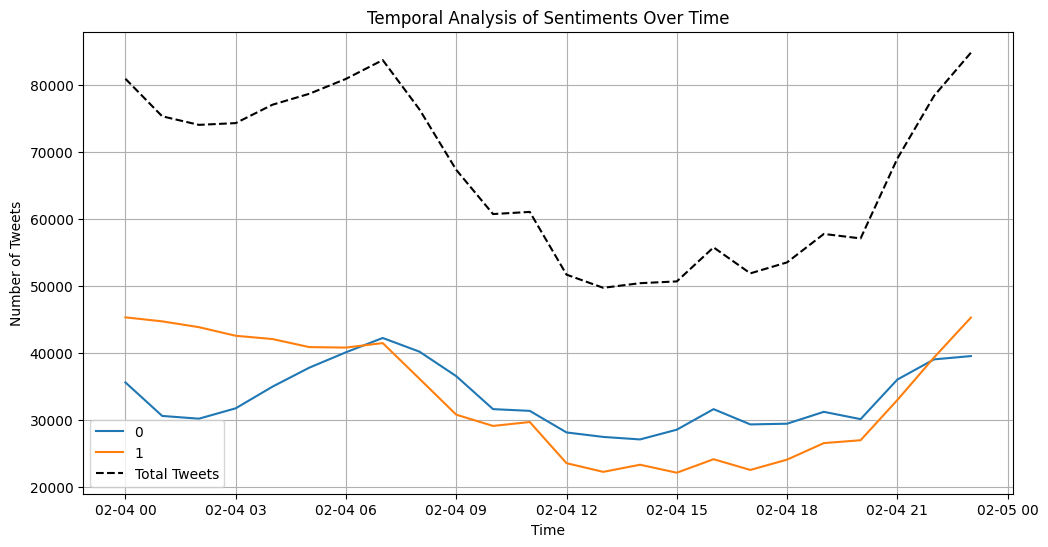

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for sentiment_category in sentiment_categories:
    plt.plot(df_grouped['timestamp'], df_grouped[sentiment_category], label=sentiment_category)

plt.plot(df_grouped['timestamp'], df_grouped['total_tweets'], label='Total Tweets', linestyle='--', color='black')

plt.title('Temporal Analysis of Sentiments Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
df[['sentiment','text']].sample(10)

,sentiment,text
587891,0,@mileycyrus if true love waits... i better fin...
76535,0,My brain was so stucked i dont know what to wr...
150425,0,just love the jonas brothers its tooo bad i w...
694336,0,Must I really choose between overnite stay in ...
948774,1,Going to bed! Gotta get up early and go suppor...
1143491,1,Found this on my whiteboard when I got back......
439307,0,@Chijakane I know and I feel bad I didn't go b...
62088,0,"Haaaay, i hate the whole Back-to-reality thing..."
1384554,1,"Then, tomorrow, photoshoot!"
56271,0,@ccsilva2 ill have to get it in the morning. b...


In [19]:
df['length'] = df['text'].apply(len)

<Axes: ylabel='Frequency'>

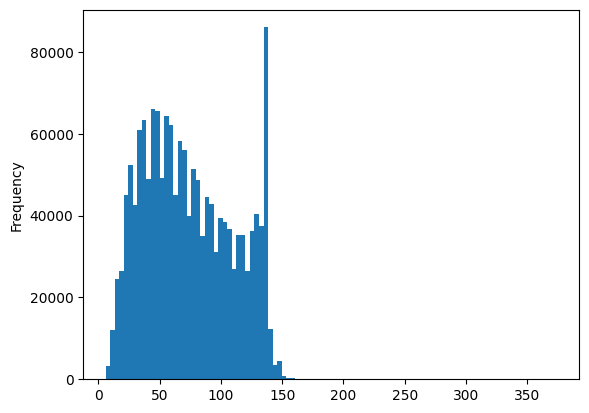

In [20]:
df['length'].plot(bins=100, kind='hist') 

In [21]:
df = df[['sentiment','text','length']]
df.describe()

,length
count,1.600000e+06
mean,7.409011e+01
std,3.644114e+01
min,6.000000e+00
25%,4.400000e+01
50%,6.900000e+01
75%,1.040000e+02
max,3.740000e+02


In [22]:
df[df['length'] == 74]['text'].iloc[0]

"My thoughts are with Sandra Cantu's family at this difficult and sad time "

In [23]:
df[df['length'] == 6]['text'].iloc[0]

' just '

In [24]:
df[df['length'] == 374]['text'].iloc[0]

'@catfish_ohm à¹\x80à¸\x84à¹\x89à¸²à¹\x83à¸«à¹\x89à¸?à¸²à¸£à¹\x8cà¸\x95à¸¹à¸\x99à¸?à¸¸à¹\x82à¸£à¸°(à¸ªà¸±à¸ªà¹\x86+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹\x84à¸\x94à¹\x89à¹?à¸\x97à¸\x99à¸\x99à¸°à¸\x9eà¸\xadà¸\x94à¸µà¸¡à¸´à¹\x82à¸?à¸°à¸«à¸§à¸\x87(à¸\x82à¸\x99à¸²à¸\x94à¹\x80à¸\x9fà¸´à¸\x99à¹?à¸?à¸¢à¸±à¸\x87à¹\x80à¸\x84à¸¢à¹\x83à¸«à¹\x89à¹\x84à¸¡à¹\x88à¹\x83à¸\x8aà¹\x88à¹\x80à¸«à¸£à¸\xad.à¹?à¸\x95à¹\x88à¸\x8aà¹\x88à¸²à¸\x87à¹\x80à¸«à¸\xadà¸°à¸£à¸²à¸¢à¸\x99à¸±à¹\x89à¸\x99à¹\x80à¸\x82à¸²à¹\x82à¸¡à¹\x80à¸\xadà¸°à¸?à¸§à¹\x88à¸²à¸\x9bà¸¥à¸²à¹?à¸¡à¸§à¹\x80à¸¢à¸\xadà¸° = '

**Data Visualisation**

In [25]:
sentences = df['text'].tolist()
sentences_string = " ".join(sentences)

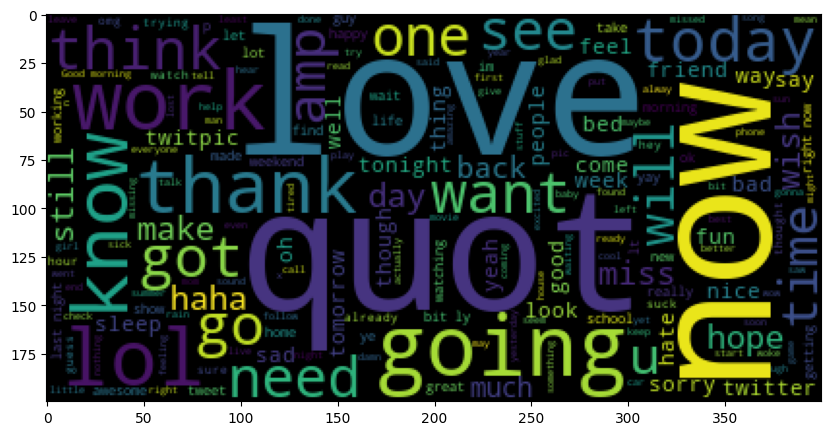

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_string))

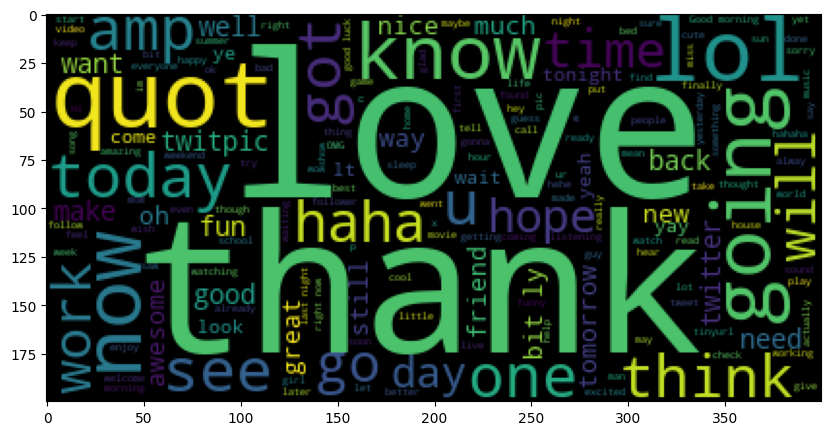

In [27]:
sentences = df[df['sentiment'] == 1]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_string))

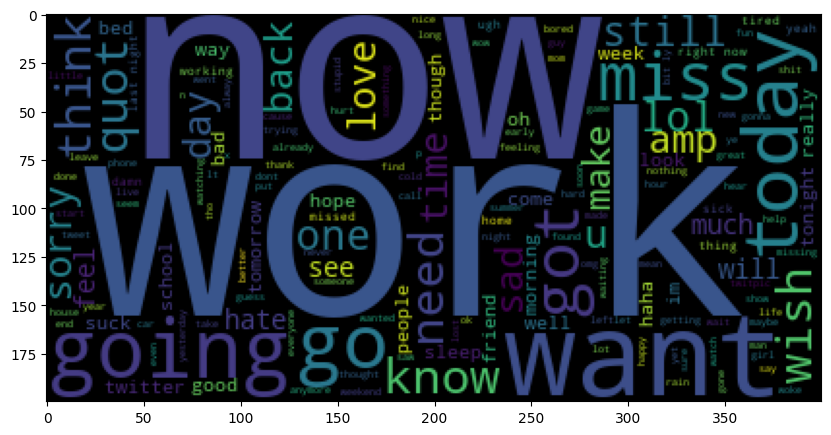

In [28]:
sentences = df[df['sentiment'] == 0]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_string))

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Text Cleaning**

In [31]:
df['Clean_TweetText'] = df['text']
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,89,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,"@nationwideclass no, it's not behaving at all...."


In [32]:
for a in string.punctuation:
    df['Clean_TweetText'] = df['Clean_TweetText'].str.replace(a, "")
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his Facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,89,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no its not behaving at all im ...


**Remove Stopwords**

In [33]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [34]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,is upset that he can't update his Facebook by ...,111,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dived many times ball managed save 50...
3,0,my whole body feels itchy and like its on fire,47,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behaving im mad cant see


**Tokenization and Normalization**

In [35]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: x.split())
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"[switchfoot, httptwitpiccom2y1zl, awww, thats,..."
1,0,is upset that he can't update his Facebook by ...,111,"[upset, cant, update, facebook, texting, might..."
2,0,@Kenichan I dived many times for the ball. Man...,89,"[kenichan, dived, many, times, ball, managed, ..."
3,0,my whole body feels itchy and like its on fire,47,"[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",111,"[nationwideclass, behaving, im, mad, cant, see]"


In [36]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"[switchfoot, httptwitpiccom2y1zl, awww, that, ..."
1,0,is upset that he can't update his Facebook by ...,111,"[upset, cant, updat, facebook, text, might, cr..."
2,0,@Kenichan I dived many times for the ball. Man...,89,"[kenichan, dive, mani, time, ball, manag, save..."
3,0,my whole body feels itchy and like its on fire,47,"[whole, bodi, feel, itchi, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",111,"[nationwideclass, behav, im, mad, cant, see]"


**Reform the tokens**

In [37]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,sentiment,text,length,Clean_TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot httptwitpiccom2y1zl awww that bumme...
1,0,is upset that he can't update his Facebook by ...,111,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save 50 res...
3,0,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav im mad cant see


**Removing words with less than 3 letters**

df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

**Vectorize the text**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(dtype = 'uint8')
df_countvectorizer = vectorizer.fit_transform(df['text'])

In [40]:
df_countvectorizer.shape

(1600000, 684358)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_countvectorizer, df['sentiment'],test_size = 0.25, random_state=0)

In [42]:
print(X_train.shape,X_test.shape)

(1200000, 684358) (400000, 684358)


In [43]:
print(y_train.shape,y_test.shape)

(1200000,) (400000,)


## MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

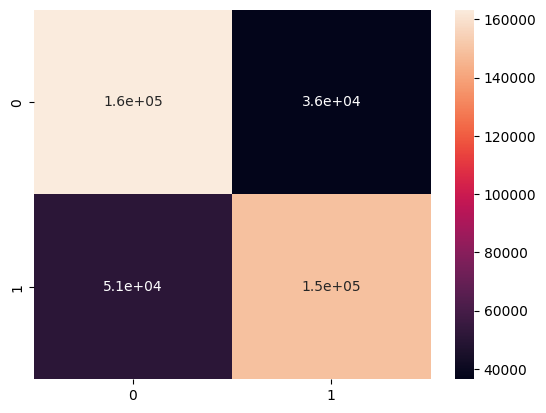

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79    199734
           1       0.80      0.74      0.77    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=1)

<Axes: >

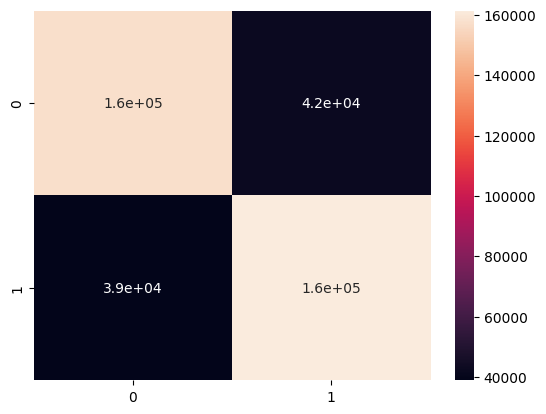

In [48]:
y_predict_test = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79    199734
           1       0.79      0.81      0.80    200266

    accuracy                           0.80    400000
   macro avg       0.80      0.80      0.80    400000
weighted avg       0.80      0.80      0.80    400000



## BernoulliNB

In [50]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

<Axes: >

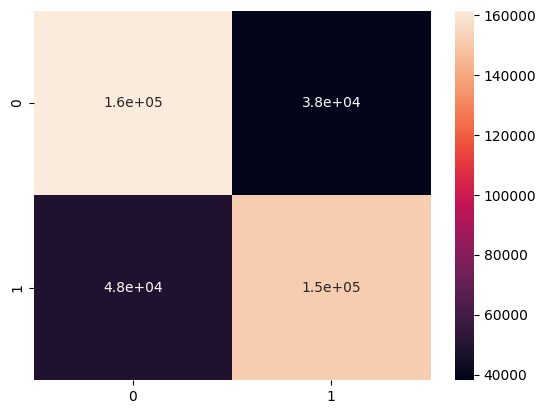

In [51]:
y_predict_test = BNBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79    199734
           1       0.80      0.76      0.78    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000

